In [1]:

!pip install statsmodels
!pip install seaborn
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  # Para matriz de correlaciones
import statsmodels.api as sm   
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, average_precision_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from scipy.special import expit

#Defino el repositorio 
os.chdir('C:/Users/rodri/OneDrive/Escritorio/Maestría/Big Data/BigData/TP4')

## Parte 1 

#### Ejercicio 1 

Primero cargamos la os datos de la encuenta de hogat y consevamos solo las observaciones que corresponden a los aglomerados 32 y 33

In [2]:
base_hogar = pd.read_excel("usu_hogar_T123.xlsx")


base_hogar_bs = base_hogar[(base_hogar['AGLOMERADO'] == 32) | (base_hogar['AGLOMERADO'] == 33)]

#### Ejercicio 2

In [11]:
base_individual = pd.read_excel("usu_individual_T123.xlsx")
#base_individual = pd.read_csv("usu_individual_T122.csv", low_memory=False)

base_individual_bs = base_individual[(base_individual['AGLOMERADO'] == 32) | (base_individual['AGLOMERADO'] == 33)]

In [12]:
base_merge = base_individual_bs.merge(base_hogar_bs, left_on=['CODUSU', 'NRO_HOGAR'], right_on=['CODUSU', 'NRO_HOGAR'], how='outer', suffixes=('', '_y'))

base_merge.drop(base_merge.filter(regex='_y$').columns, axis=1, inplace=True)

base_merge

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,2,3,1,2,1,2,98,0,0,0
7615,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,2,1,0,1,1,0,96,0,0,0
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0


Ejercicio 3

In [13]:
print("Cantidad de Missing Values  - ")
for column in base_merge.columns:
    percentage_missing = np.mean(base_merge[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Cantidad de Missing Values  - 
CODUSU : 0%
ANO4 : 0%
TRIMESTRE : 0%
NRO_HOGAR : 0%
COMPONENTE : 0%
H15 : 0%
REGION : 0%
MAS_500 : 0%
AGLOMERADO : 0%
PONDERA : 0%
CH03 : 0%
CH04 : 0%
CH05 : 0%
CH06 : 0%
CH07 : 0%
CH08 : 0%
CH09 : 0%
CH10 : 0%
CH11 : 0%
CH12 : 0%
CH13 : 0%
CH14 : 52%
CH15 : 0%
CH15_COD : 82%
CH16 : 0%
CH16_COD : 99%
NIVEL_ED : 0%
ESTADO : 0%
CAT_OCUP : 0%
CAT_INAC : 0%
IMPUTA : 99%
PP02C1 : 0%
PP02C2 : 0%
PP02C3 : 0%
PP02C4 : 0%
PP02C5 : 0%
PP02C6 : 0%
PP02C7 : 0%
PP02C8 : 0%
PP02E : 0%
PP02H : 0%
PP02I : 0%
PP03C : 54%
PP03D : 54%
PP3E_TOT : 54%
PP3F_TOT : 54%
PP03G : 54%
PP03H : 54%
PP03I : 54%
PP03J : 54%
INTENSI : 54%
PP04A : 54%
PP04B_COD : 54%
PP04B1 : 54%
PP04B2 : 54%
PP04B3_MES : 54%
PP04B3_ANO : 54%
PP04B3_DIA : 54%
PP04C : 54%
PP04C99 : 54%
PP04D_COD : 54%
PP04G : 54%
PP05B2_MES : 54%
PP05B2_ANO : 54%
PP05B2_DIA : 54%
PP05C_1 : 54%
PP05C_2 : 54%
PP05C_3 : 54%
PP05E : 54%
PP05F : 54%
PP05H : 54%
PP06A : 54%
PP06C : 54%
PP06D : 54%
PP06E : 54%
PP06H : 54%
PP07A :

Eliminamos si tienen más de 50% de NAs

In [14]:
na_percentage = base_merge.isna().sum()/base_merge.shape[0]*100
col_to_drop = na_percentage[na_percentage>50].keys() # Eliminamos las columnas con más de 50% de missing values.
base_merge2 = base_merge.drop(col_to_drop, axis=1)

In [15]:
base_merge3 = base_merge2[base_merge2.select_dtypes(include=[np.number]).ge(0).all(1)].reset_index(drop=True)
base_merge3

# Por fuera de los paquetes, eliminamos observaciones con datos NS/NC en la variable para cantidad de habitaciones 
base_merge3 = base_merge3[(base_merge3['IV2'] < 99)]



EXPLICAR POR QUE ELEGIMOS ESTAS CATEGORICAS

In [ ]:
# Categorica: IV1, IV3, IV6, IV7, IV8, IV9, IV12_1, IV12_3, II7, II8, V1, V2, V5, DECCFR, CH09, CH10, CH11, CH12

In [16]:
for col in ['IV1', 'IV3', 'IV6', 'IV7', 'IV8', 'IV9', 'IV12_1', 'IV12_3', 'II7', 'II8', 'V1', 'V2', 'V5', 'DECCFR', 'CH09', 'CH10', 'CH11', 'CH12']:
    base_merge3[col] = base_merge3[col].astype('category')

Mostramos como queda la base luego de estas modificaciones

In [18]:
base_merge

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,2,3,1,2,1,2,98,0,0,0
7615,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,2,1,0,1,1,0,96,0,0,0
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0


## Ejercicio 4
Construimos  variables que no estén en la base y que sean relevantes para predecir individuos bajo la línea de pobreza. Las que elegimos son las siguientes:

In [19]:
# Primero creamos la variable proporcion de menores de 10 en el hogar

base_merge3['Prop_Men10'] = base_merge3.apply(lambda row: row.IX_MEN10 / row.IX_TOT, axis=1)

In [20]:
# Casa de materiales malos

def f(x):
    '''
    esta funcion lo que hace es buscar casas que cumplan la condicion de estar hecha de materiales malos (ladrillo suelto
    o tierra) con el objetivo de crear una nueva columna, llamada casa_mala
    '''
    
    if x['IV1'] == 1 and x['IV3'] == 3:
        return 1
    else:
        return 0

base_merge3['casa_mala'] = base_merge3.apply(f, axis=1).astype('category')

In [21]:
def g(x):
    '''
    esta funcion crea una condicion que devuelve un 1 si hay mas miembros totales del hogar que ambientes
    '''
    
    if x['IX_TOT'] > x['II1']:
        return 1
    else:
        return 0

base_merge3['potencial_hacinamiento'] = base_merge3.apply(g, axis=1).astype('category')   

### Ejercicio 5 

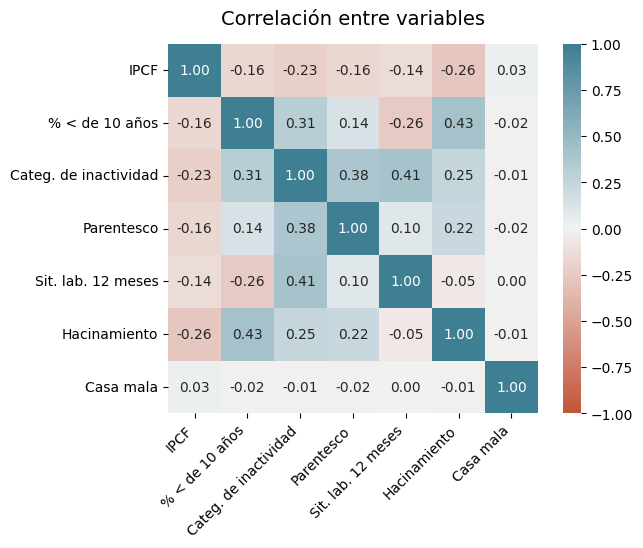

In [22]:
# Creamos una base auxiliar para calcular la correlacion entre distintas variables
base_corr = base_merge3[['IPCF', 'Prop_Men10', 'CAT_INAC', 'CH03', 'PP02I','potencial_hacinamiento', 'casa_mala']]

plt.title('Correlación entre variables', y=1.03, size=14)

# Definimos las labels para el heatmap. 

x_axis_labels = ['IPCF', '% < de 10 años', 'Categ. de inactividad', 'Parentesco', 'Sit. lab. 12 meses', 'Hacinamiento', 'Casa mala']

ax = sns.heatmap(
    base_corr.astype(float).corr(), 
    vmin=-1, vmax=1, center=0, fmt='.2f',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    xticklabels=x_axis_labels,
    yticklabels=x_axis_labels
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Ejercicio 6 (MEJORABLE)

In [26]:
# Importamos y limpiamos las filas vacias de la tabla de equivalencias
tabla_equivalencias = pd.read_excel("tabla_adulto_equiv.xlsx", skiprows=[0, 1, 2, 4, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])


In [27]:
# Cambiamos una fila de la tabla de equivalencias para que sea igual a nuestros datos
tabla_equivalencias.at[1, 'Edad'] = '1 años'

In [28]:
# Creamos una funcion lambda donde, segun el rango de edad, genera otra columna con el mismo formato que el de tabla de equivalencias 
base_merge3['Edad'] = base_merge3['CH06'].apply(lambda x: '61 a 75 años' if x >= 61 and x <= 75 else ('46 a 60 años' if x >= 46 and x <= 60 else 
                                                                                                          ('30 a 45 años' if x >= 30 and x <= 45 else 
                                                                                                           ('18 a 29 años' if x >= 18 and x <= 29 else
                                                                                                           ('más de 75 años' if x > 75 else ('Menor de 1 año' if x < 1 else
                                                                                                                                             str(x)+ ' años'))))))

# Hacemos el mismo proceso anterior pero ahora para una tabla de genero
base_merge3['Genero'] = base_merge3['CH04'].apply(lambda x: 'Varones' if x <= 1 else 'Mujeres') 

In [29]:
# Partimos la base en dos (mujeres y hombres) para agilizar el proximo loop
base_mujeres = base_merge3[(base_merge3['CH04'] == 2)]
base_varones = base_merge3[(base_merge3['CH04'] == 1)]

In [30]:
# Para la base de mujeres, corremos un loop que busca por cada valor de la columna Edad, en la base del INDEC, y lo matchea con los valores de la columna Mujeres, de la tabla de equivalencias.

lista = []
for i in range(0, len(base_mujeres)):
    for x in range(0, len(tabla_equivalencias)):
        if base_mujeres.iloc[i]['Edad'] == tabla_equivalencias.iloc[x]['Edad']:
             lista.append(tabla_equivalencias.iloc[x]['Mujeres'])
base_mujeres['adulto_equiv'] = lista

C:\Users\rodri\AppData\Local\Temp\ipykernel_20936\3150114662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_mujeres['adulto_equiv'] = lista


In [ ]:
# Repetimos el mismo proceso para la base de Hombres
lista_2 = []
for i in range(0, len(base_varones)):
    for x in range(0, len(tabla_equivalencias)):
        if base_varones.iloc[i]['Edad'] == tabla_equivalencias.iloc[x]['Edad']:
             lista_2.append(tabla_equivalencias.iloc[x]['Varones'])
base_varones['adulto_equiv'] = lista_2   

In [ ]:
# Unimos ambas bases 
base_merge3 = base_mujeres.append(base_varones)

#Finamente, creamos la columna de equivalencias nutricionales por hogar
data = base_merge3.groupby(['CODUSU', 'NRO_HOGAR']).sum()[['adulto_equiv']]
data = data.rename(columns={'adulto_equiv':'ad_equiv_hogar'})

In [ ]:
base_merge4 = base_merge3.merge(data, left_on=['CODUSU', 'NRO_HOGAR'], right_on=['CODUSU', 'NRO_HOGAR'], how='outer')

In [ ]:
# Creamos las bases pedidas en la consigna
respondieron =  base_merge4[(base_merge4['ITF'] > 0)]
norespondieron = base_merge4[(base_merge4['ITF'] == 0)]

In [ ]:
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'].apply(lambda x: x*27197.64)

In [ ]:
def pobre(respondieron):
    '''
    esta función busca si los ingresos totales familiares son menores que los ingresos necesarios
    para que un hogar no sea pobre, así como lo contrario, y nos devuelve un 1 si se cumple que 
    los ingresos totales son menores que los necesarios, y un 0 si son mayores o iguales. 
    '''
    if respondieron['ITF'] < respondieron['ingreso_necesario']:
        return 1
    elif respondieron['ITF'] >= respondieron['ingreso_necesario']:
        return 0

In [ ]:
#ahora creamos una columna nueva que surge de aplicar la función que definimos a nuestra base de datos. 
respondieron['pobre'] = respondieron.apply(pobre, axis=1)

Pregunta 7

In [ ]:
#Creamos un objeto donde por hogar se suman las ponderaciones y se promedia el valor de "pobre". Para que el hogar sea considerado pobre, todos sus integrantes deben serlo, por lo que este cálculo nos permite luego seleccionar solo aquellos hogares donde el promedio de la variable "pobre" sea 1 (lo que da cuenta de que todos sus integrantes tenían este valor).

pondih = respondieron.groupby(['CODUSU', 'NRO_HOGAR']).agg({'PONDIH' : 'sum', "pobre" : "mean"})
    
(pondih.loc[pondih['pobre'] == 1, "PONDIH"].sum()) / (pondih["PONDIH"].sum())

print("El",round(pondih.loc[pondih['pobre'] == 1, "PONDIH"].sum() / (pondih["PONDIH"].sum())*100,2),"% de hogares es pobr